# Exercises 4 - Marja Satukangas

In [1]:
import numpy as np
import scipy
import scipy.stats
import scipy.signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, BatchNormalization

## MNIST with complex dense model

Create a complex MNIST model with 5-10 dense layers and about 500k weights that overfits (follow accuracies during training). 

Add batch normalisation to the model and plot training and validation accuracies. What are your findings?

(Give your models descriptive names to make it easier to do the comparisons)

Add to the model a) regularisation, b) dropout layers and plot training and validation accuracies. Again, write a brief overview of your findings.

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_val = x_val.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(y_train)
y_val_cat = keras.utils.to_categorical(y_val)

## Model 1 - overfitted 5 layer model

In [3]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(512, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 509,514
Trainable params: 509,514
Non-trainable params: 0
__________________________________________________

In [4]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/30
938/938 [==============================] - 6s 7ms/step - loss: 1.0031 - acc: 0.7038 - val_loss: 0.3929 - val_acc: 0.8864
Epoch 2/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2898 - acc: 0.9153 - val_loss: 0.2347 - val_acc: 0.9329
Epoch 3/30
938/938 [==============================] - 6s 6ms/step - loss: 0.2136 - acc: 0.9376 - val_loss: 0.1911 - val_acc: 0.9450
Epoch 4/30
938/938 [==============================] - 7s 7ms/step - loss: 0.1720 - acc: 0.9498 - val_loss: 0.1603 - val_acc: 0.9522
Epoch 5/30
938/938 [==============================] - 6s 6ms/step - loss: 0.1445 - acc: 0.9580 - val_loss: 0.1525 - val_acc: 0.9521
Epoch 6/30
938/938 [==============================] - 5s 6ms/step - loss: 0.1221 - acc: 0.9653 - val_loss: 0.1315 - val_acc: 0.9606
Epoch 7/30
938/938 [==============================] - 6s 6ms/step - loss: 0.1079 - acc: 0.9682 - val_loss: 0.1117 - val_acc: 0.9659
Epoch 8/30
938/938 [==============================] - 6s 6ms/step - loss: 0.

Training acc 0.9991499781608582 Validation acc 0.9775000214576721


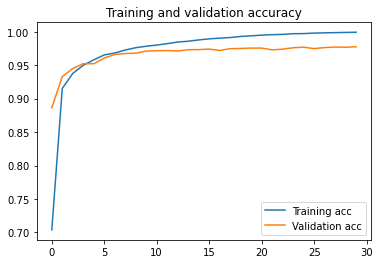

In [5]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Model 2 - batch normalization

In [6]:
model2 = keras.models.Sequential()

model2.add(keras.layers.Dense(512, input_shape=(28 * 28,), activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [7]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist2 = model2.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/30
938/938 [==============================] - 7s 8ms/step - loss: 0.4007 - acc: 0.8835 - val_loss: 0.1770 - val_acc: 0.9474
Epoch 2/30
938/938 [==============================] - 7s 7ms/step - loss: 0.1689 - acc: 0.9514 - val_loss: 0.1271 - val_acc: 0.9607
Epoch 3/30
938/938 [==============================] - 6s 7ms/step - loss: 0.1210 - acc: 0.9646 - val_loss: 0.1071 - val_acc: 0.9678
Epoch 4/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0936 - acc: 0.9727 - val_loss: 0.0975 - val_acc: 0.9709
Epoch 5/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0745 - acc: 0.9787 - val_loss: 0.0923 - val_acc: 0.9727
Epoch 6/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0597 - acc: 0.9833 - val_loss: 0.0900 - val_acc: 0.9719
Epoch 7/30
938/938 [==============================] - 6s 7ms/step - loss: 0.0514 - acc: 0.9854 - val_loss: 0.0857 - val_acc: 0.9736
Epoch 8/30
938/938 [==============================] - 6s 6ms/step - loss: 0.

Training acc 0.9986333250999451 Validation acc 0.9782000184059143


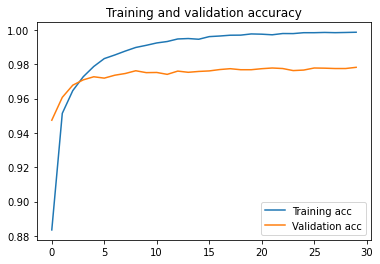

In [8]:
acc = hist2.history['acc']
val_acc = hist2.history['val_acc']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Model 1 and 2 comparison

Both models are overfitted. Batch normalization has not really effect for the this model. Accuracies are almost the same.

## Model 3 - regularisation  

In [9]:
from tensorflow.keras.regularizers import l2

model3 = keras.models.Sequential()

model3.add(keras.layers.Dense(512, input_shape=(28 * 28,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model3.add(BatchNormalization())
model3.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model3.add(BatchNormalization())
model3.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model3.add(BatchNormalization())
model3.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model3.add(BatchNormalization())
model3.add(keras.layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

In [10]:
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist3 = model3.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/30
938/938 [==============================] - 10s 11ms/step - loss: 5.6291 - acc: 0.8817 - val_loss: 4.4816 - val_acc: 0.9528
Epoch 2/30
938/938 [==============================] - 10s 10ms/step - loss: 3.7707 - acc: 0.9539 - val_loss: 3.1107 - val_acc: 0.9656
Epoch 3/30
938/938 [==============================] - 10s 11ms/step - loss: 2.6193 - acc: 0.9674 - val_loss: 2.1815 - val_acc: 0.9710
Epoch 4/30
938/938 [==============================] - 9s 10ms/step - loss: 1.8392 - acc: 0.9738 - val_loss: 1.5532 - val_acc: 0.9725
Epoch 5/30
938/938 [==============================] - 9s 10ms/step - loss: 1.3063 - acc: 0.9780 - val_loss: 1.1241 - val_acc: 0.9716
Epoch 6/30
938/938 [==============================] - 9s 10ms/step - loss: 0.9445 - acc: 0.9801 - val_loss: 0.8575 - val_acc: 0.9647
Epoch 7/30
938/938 [==============================] - 9s 10ms/step - loss: 0.7001 - acc: 0.9800 - val_loss: 0.6386 - val_acc: 0.9719
Epoch 8/30
938/938 [==============================] - 9s 9ms/step 

Training acc 0.9856333136558533 Validation acc 0.9718999862670898


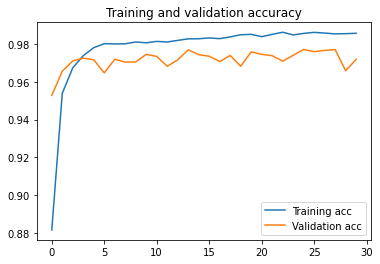

In [11]:
acc = hist3.history['acc']
val_acc = hist3.history['val_acc']
loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Model 4 - dropout

In [12]:
model4 = keras.models.Sequential()

model4.add(keras.layers.Dense(512, input_shape=(28 * 28,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model4.add(BatchNormalization())
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model4.add(keras.layers.Dropout(0.2))
model4.add(BatchNormalization())
model4.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model4.add(keras.layers.Dropout(0.2))
model4.add(BatchNormalization())
model4.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model4.add(BatchNormalization())
model4.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model4.add(BatchNormalization())
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [13]:
model4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist4 = model4.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/30
938/938 [==============================] - 10s 11ms/step - loss: 0.7882 - acc: 0.7938 - val_loss: 0.3217 - val_acc: 0.9374
Epoch 2/30
938/938 [==============================] - 10s 11ms/step - loss: 0.4403 - acc: 0.9028 - val_loss: 0.2672 - val_acc: 0.9536
Epoch 3/30
938/938 [==============================] - 11s 12ms/step - loss: 0.3772 - acc: 0.9218 - val_loss: 0.2453 - val_acc: 0.9603
Epoch 4/30
938/938 [==============================] - 10s 11ms/step - loss: 0.3397 - acc: 0.9333 - val_loss: 0.2293 - val_acc: 0.9650
Epoch 5/30
938/938 [==============================] - 11s 12ms/step - loss: 0.3134 - acc: 0.9405 - val_loss: 0.2203 - val_acc: 0.9680
Epoch 6/30
938/938 [==============================] - 11s 11ms/step - loss: 0.2924 - acc: 0.9463 - val_loss: 0.2072 - val_acc: 0.9712
Epoch 7/30
938/938 [==============================] - 9s 10ms/step - loss: 0.2782 - acc: 0.9498 - val_loss: 0.2024 - val_acc: 0.9729
Epoch 8/30
938/938 [==============================] - 9s 10ms/s

Training acc 0.982450008392334 Validation acc 0.9824000000953674


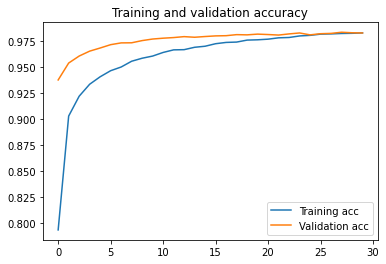

In [14]:
acc = hist4.history['acc']
val_acc = hist4.history['val_acc']
loss = hist4.history['loss']
val_loss = hist4.history['val_loss']

print('Training acc', acc[-1], 'Validation acc', val_acc[-1])

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Model 3 and 4 comparison

Regularization has not really effect on overfitting but dropout layers are effective. With dropout layers the model achieves best accuracy with validation set (0.98). That is very good result.